In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib import colors
from IPython.display import clear_output
import time

In [2]:
print("setting up the environment")
print('-'*10)

grid_size = 5
goal_state = (4, 4)
start_state = (0, 0)
actions = ['up', 'down', 'left', 'right']

setting up the environment
----------


In [3]:
obstacles = [(1,1), (2,2), (3,1), (1,3)]

print(f" Grid Size: {grid_size}x{grid_size}")
print(f" Start: {start_state}, Goal: {goal_state}")
print(f" Possible Actions: {actions}")
print(f" Obstacles: {obstacles}")

 Grid Size: 5x5
 Start: (0, 0), Goal: (4, 4)
 Possible Actions: ['up', 'down', 'left', 'right']
 Obstacles: [(1, 1), (2, 2), (3, 1), (1, 3)]


In [4]:
Q = np.zeros((grid_size, grid_size, len(actions)))
print(f" Q-table shape: {Q.shape} (rows, columns, actions)")
print(" This means: 5 rows x 5 columns x 4 possible actions")


 Q-table shape: (5, 5, 4) (rows, columns, actions)
 This means: 5 rows x 5 columns x 4 possible actions


In [5]:
alpha = 0.1
gamma = 0.9
epsilon = 0.3
episodes = 500

print(f" Learning Rate: {alpha} - How fast we learn")
print(f" Discount Factor: {gamma} - How much we care about future rewards")
print(f" Exploration Rate: {epsilon} - Chance of exploring vs using what we know")
print(f" Training Episodes: {episodes} - How many times we'll practice")

 Learning Rate: 0.1 - How fast we learn
 Discount Factor: 0.9 - How much we care about future rewards
 Exploration Rate: 0.3 - Chance of exploring vs using what we know
 Training Episodes: 500 - How many times we'll practice


In [6]:
def choose_action(state):
  """
  choose between EXPLORATION (try new things) and EXPLOITATION (use what we know)
  """
  if random.uniform(0, 1) < epsilon:
    action = random.choice(range(len(actions)))
    print(f" Exploring Random action: {actions[action]}")
  else:
    action = np.argmax(Q[state[0], state[1]])
    print(f" Exploiting known action: {actions[action]}")
  return action

In [7]:
def step(state, action):
  i, j = state
  if actions[action] == 'up':
    i = max(i-1, 0)
  elif actions[action] == 'down':
    i = min(i+1, grid_size-1)
  elif actions[action] == 'left':
    j = max(j-1, 0)
  elif actions[action] == 'right':
    j = min(j+1, grid_size-1)

  if (i, j) in obstacles:
    print("Hit an obstical Staying at {state}")
    i, j = state
    reward = -5
    done = False
  elif (i, j) == goal_state:
    reward = 20
    done = True
    print(f" REACHED GOAL! Got reward: {reward}")
  else:
    reward = -1
    done = False
  return (i, j), reward, done

In [8]:
def update_q_table(state, action, next_state, reward):
  current_q = Q[state[0], state[1], action]
  max_feture_q = np.max(Q[next_state[0], next_state[1]])

  new_q = current_q + alpha * (reward + gamma * max_feture_q - current_q)
  Q[state[0], state[1], action] = new_q

  print(f" Learning Update:")
  print(f" state {state}, Action: {actions[action]}")
  print(f" Old Q-value: {current_q:.2f} New Q-value: {new_q:.2f}")
  print(f" Reward: {reward}, Max Future Q: {max_feture_q:.2f}")


In [9]:
def plot_grid(agent_pos, episode=None, step_count = None):
  grid = np.zeros((grid_size, grid_size))

  for obs in obstacles:
    grid[obs] = -1
  grid[goal_state] = 2
  grid[agent_pos] = 1
  grid[start_state] = 0.5


  cmap = colors.ListedColormap(['white', 'blue', 'green', 'red', 'yellow'])
  bounds = [-1.5, -0.5, 0.5, 1.5, 2.5, 3.5]
  norm = colors.BoundaryNorm(bounds, cmap.N)

  plt.figure(figsize=(6, 6))
  plt.imshow(grid, cmap=cmap, norm=norm)

  plt.xticks(range(grid_size))
  plt.yticks(range(grid_size))
  plt.grid(which='both', color='black', linestyle='-', linewidth=2)

  for i in range(grid_size):
    for j in range(grid_size):
      if (i, j) == agent_pos:
        plt.text(j, i, 'A', ha='center', va='center', fontsize=20)
      elif (i, j) == goal_state:
        plt.text(j, i, 'G', ha='center', va='center', fontsize=20)
      elif (i, j) in obstacles:
        plt.text(j, i, 'X', ha='center', va='center', fontsize=15)
      elif (i, j) == start_state:
        plt.text(j, i, 'S', ha='center', va='center', fontsize=15)


  title = "Q-Learning Grid World"
  if episode is not None:
    title += f" - Episode: {episode}"
  if step_count is not None:
    title += f" - Step: {step_count}"
  plt.title(title, fontsize=14, pad=20)
  plt.show()

In [11]:
def show_q_table_preview():
  print(" Q-Table Preview:")
  print("State | up | down | left | right")
  print('-'*45)
  for i in range(min(3, grid_size)):
    for j in range(min(3, grid_size)):
      if (i, j) not in obstacles and (i, j) != goal_state:
        q_vals = [f"{Q[i, j, a]:6.2f}" for a in range(len(actions))]
        print(f"({i}, {j}) | {q_vals[0]} | {q_vals[1]} | {q_vals[2]} | {q_vals[3]}")

 Episode: 1 - Watch leaning happen!


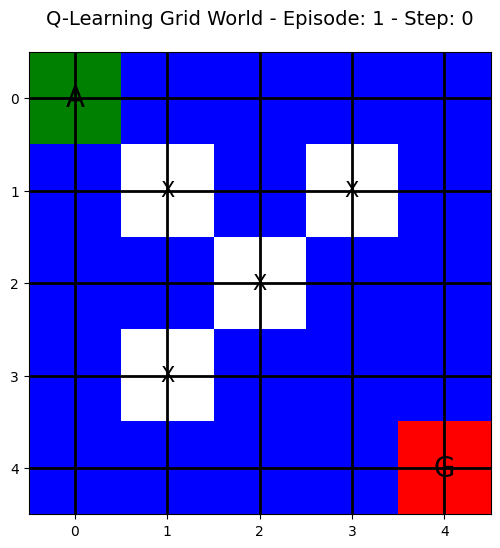


Step: 1
 Exploring Random action: down
 Learning Update:
 state (0, 0), Action: down
 Old Q-value: 0.00 New Q-value: -0.10
 Reward: -1, Max Future Q: 0.00


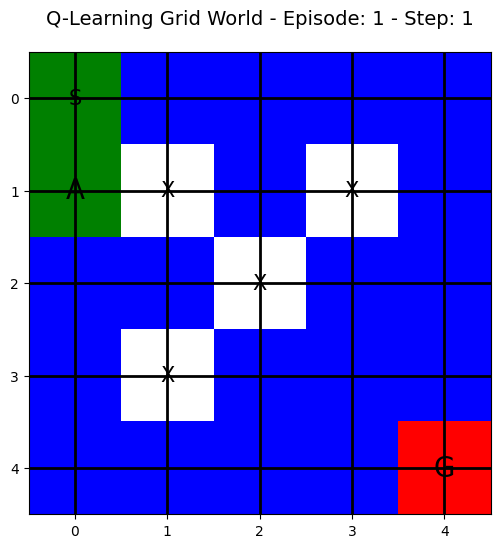


Step: 2
 Exploiting known action: up
 Learning Update:
 state (1, 0), Action: up
 Old Q-value: 0.00 New Q-value: -0.10
 Reward: -1, Max Future Q: 0.00


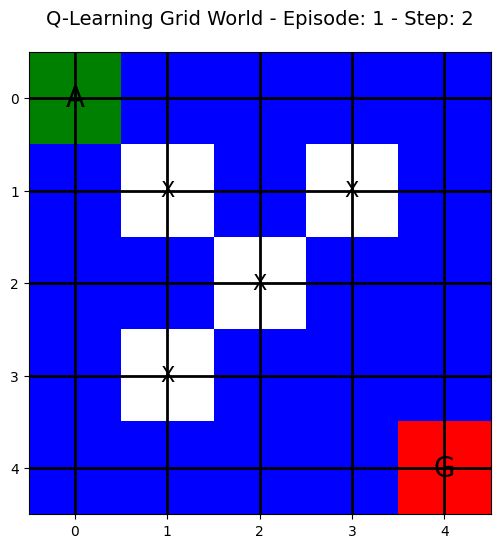


Step: 3
 Exploring Random action: down
 Learning Update:
 state (0, 0), Action: down
 Old Q-value: -0.10 New Q-value: -0.19
 Reward: -1, Max Future Q: 0.00


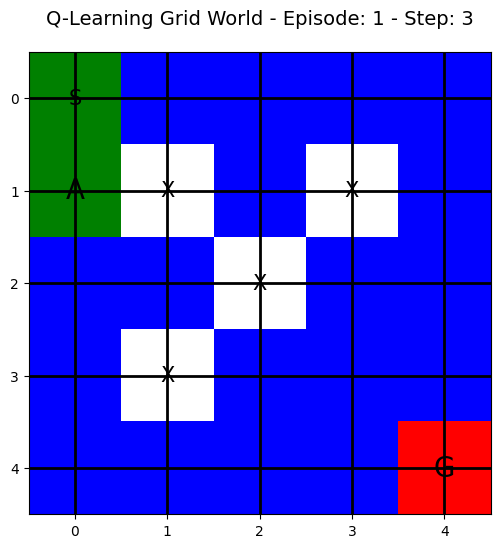


Step: 4
 Exploiting known action: down
 Learning Update:
 state (1, 0), Action: down
 Old Q-value: 0.00 New Q-value: -0.10
 Reward: -1, Max Future Q: 0.00


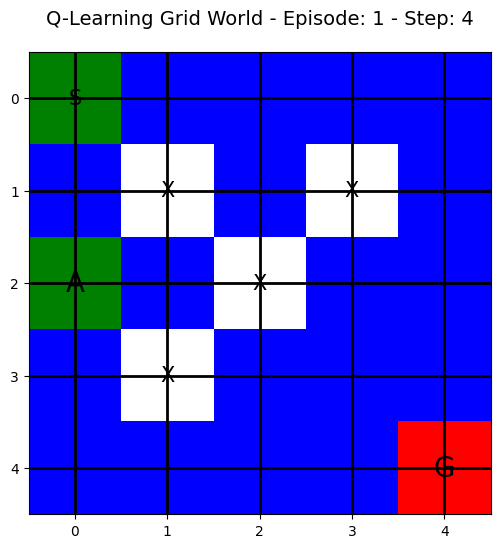


Step: 5
 Exploring Random action: down
 Learning Update:
 state (2, 0), Action: down
 Old Q-value: 0.00 New Q-value: -0.10
 Reward: -1, Max Future Q: 0.00


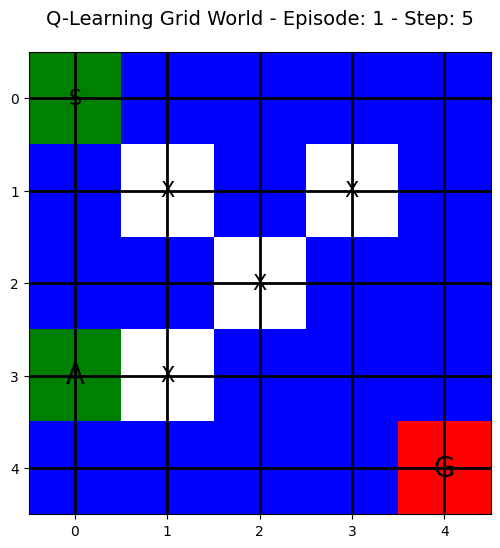


Step: 6
 Exploiting known action: up
 Learning Update:
 state (3, 0), Action: up
 Old Q-value: 0.00 New Q-value: -0.10
 Reward: -1, Max Future Q: 0.00


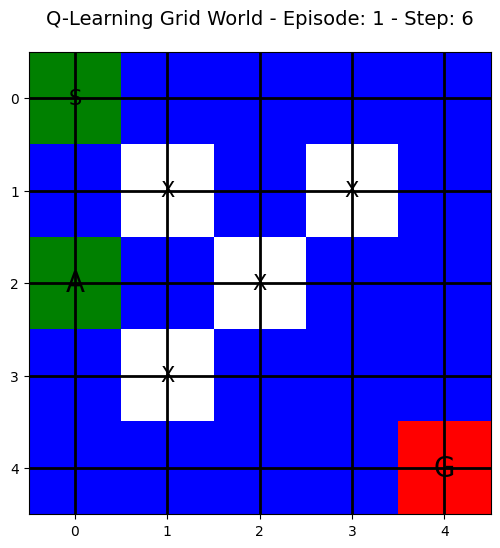


Step: 7
 Exploiting known action: up
 Learning Update:
 state (2, 0), Action: up
 Old Q-value: 0.00 New Q-value: -0.10
 Reward: -1, Max Future Q: 0.00


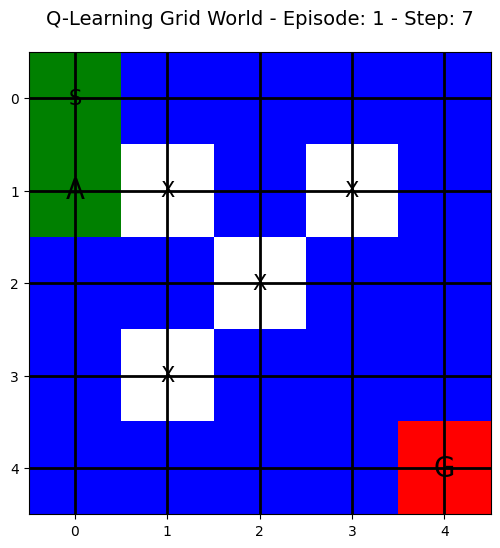

In [ ]:
steps_per_episode = []
successful_episodes = 0

for episode in range(episodes):
  state = start_state
  done = False
  steps = 0

  show_details = (episode < 2)

  if show_details:
    print(f" Episode: {episode + 1} - Watch leaning happen!")
    print('='*50)
    plot_grid(state, episode=episode+1, step_count=0)

  while not done and steps < 50:
    if show_details:
      print(f"\nStep: {steps + 1}")

    action = choose_action(state) # Moved this line outside the if block
    next_state, reward, done = step(state, action)
    update_q_table(state, action, next_state, reward)
    state = next_state
    steps += 1

    if show_details:
      plot_grid(state, episode=episode+1, step_count=steps)
      time.sleep(1)

    if done and reward > 0:
      successful_episodes += 1
  steps_per_episode.append(steps)